Assignment Overview:
In this assignment, you will implement both linear and logistic regression models using various machine learning libraries
such as TensorFlow, NumPy, Pandas, and Scikit-Learn. Additionally, you will perform Linear Discriminant Analysis (LDA)
as a dimensionality reduction technique before applying linear regression. The attached dataset (downloaded from
kaggle) contains information about university applicants, including GRE scores, TOEFL scores, university ratings,
statements of purpose (SOP), letters of recommendation (LOR), cumulative grade point averages (CGPA), and research
experience. Your objective is to build predictive models that estimate the "Chance of Admit" for each applicant, starting
with LDA for feature extraction. You can observe few records from the dataset (as shown below) where the last column
is the target variable.

1. Data Loading and Preparation:
- Import necessary libraries: OS, Pandas, NumPy, and TensorFlow.
- Load the provided CSV file into a Pandas DataFrame.
- Analyze the data and handle any missing values or outliers.

In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [76]:
df = pd.read_csv('Admission_Predict_A3.csv')

In [77]:
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [79]:
print(df.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

In [80]:
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [81]:
duplicates_df = df.duplicated().sum()

print(f"duplicates: {duplicates_df}")

duplicates: 0


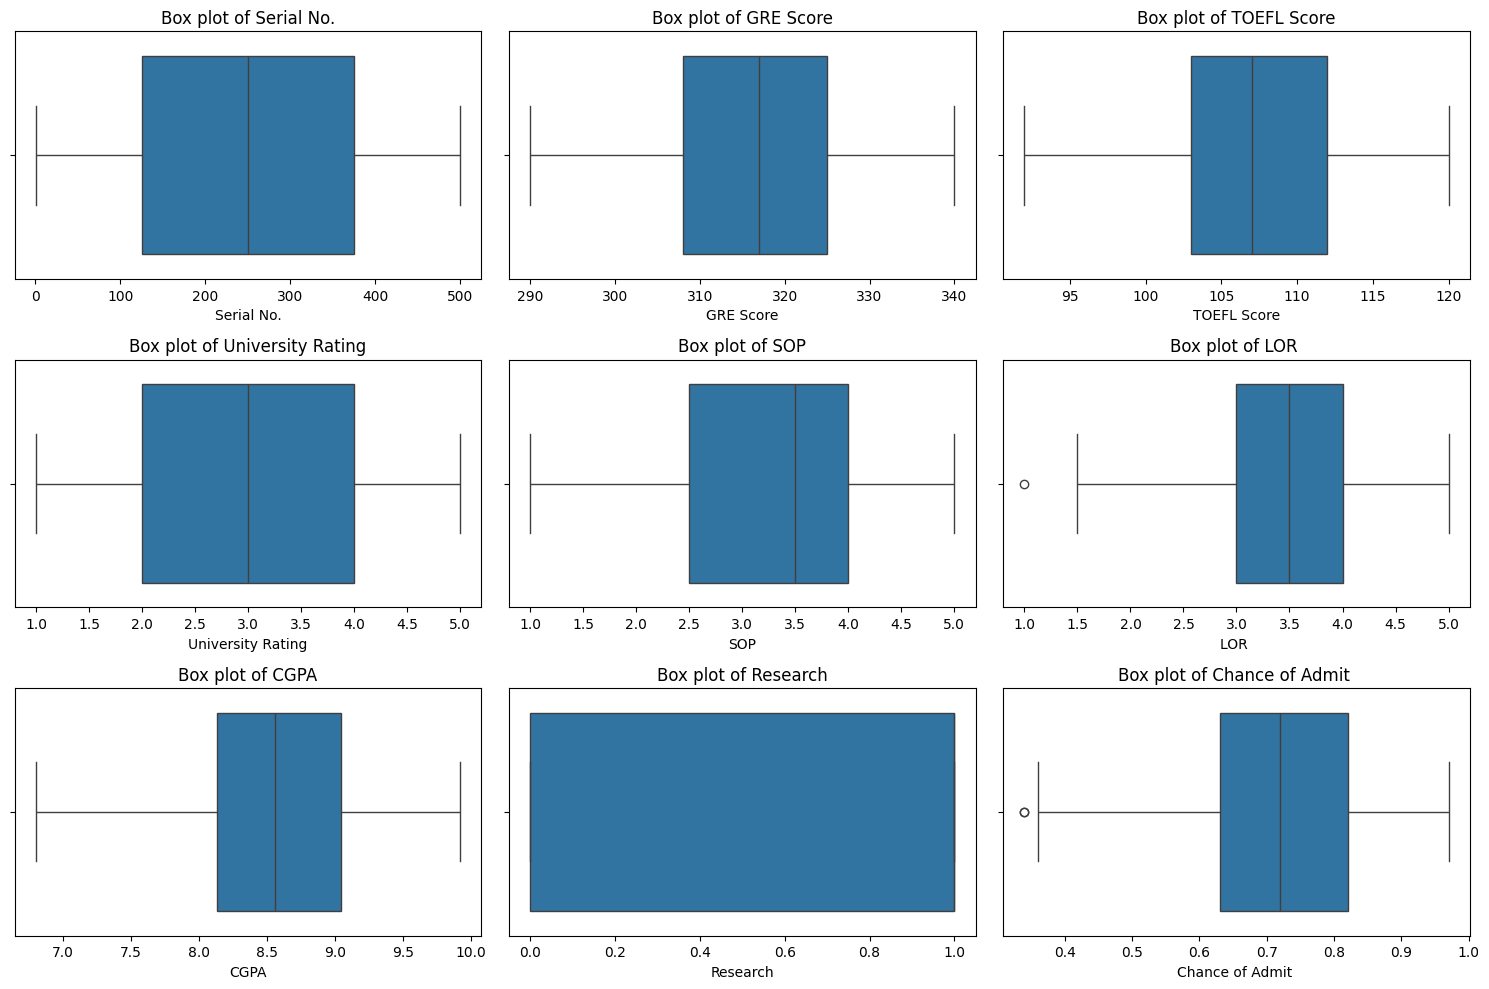

In [82]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [83]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df < lower_bound) | (df > upper_bound)
print("Number of outliers per column:")
print(outliers.sum())

Number of outliers per column:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
Chance of Admit      2
dtype: int64


In [84]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

outliers = (df < lower_bound) | (df > upper_bound)

print("Number of outliers per column:")
print(outliers.sum())

Number of outliers per column:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


2. Data Scaling:
- Select and apply an appropriate scaling technique (StandardScaler, MinMaxScaler, or RobustScaler) to normalize
the features.
- Analyze the distribution of the features and justify your choice of scaling method.
- Discuss how scaling impacts model performance

Scaling Recommendation:
Based on these observations, I recommend using StandardScaler for the following reasons:
a) Most features show approximately normal distributions, which is ideal for StandardScaler.
b) The presence of some outliers is not severe enough to necessitate RobustScaler.
c) StandardScaler preserves the shape of the distribution while centering it around zero and scaling to unit variance, which is beneficial for many machine learning algorithms.
d) It will help in comparing features that are on different scales (e.g., 'GRE Score' vs 'CGPA').
However, for 'Research' (binary feature) and 'University Rating' (ordinal feature), you might want to consider not scaling them or using different encoding methods:

For 'Research', you can leave it as is since it's already binary (0 or 1).
For 'University Rating', you could use ordinal encoding or one-hot encoding, depending on how you want to treat this feature in your models.

In [85]:
scaler = StandardScaler()

df_scaled = df.copy()

print(df_scaled.head())

columns_to_scale = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']

df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
print(df_scaled.head())
print("Mean of scaled features:\n", df_scaled[columns_to_scale].mean())
print("Standard deviation of scaled features:\n", df_scaled[columns_to_scale].std())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
   Serial No.  GRE Score  TOEFL Score  University Rating       SOP      LOR   \
0           1   1.818719     1.781161           0.769761  1.136549  1.097138   
1           2   0.660668    -0.043044           0.769761  0.629489  1.097138   
2           3  -0.051979    -0.540555          -0.107696 -0.384631  0.007672   
3           4   0.482506 

In [86]:
df_scaled.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,1,0.92
1,2,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,1,0.76
2,3,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,1,0.72
3,4,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,1,0.80
4,5,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,0,0.65


In [87]:
bin_edges = [0.3, 0.5 , 0.7 , 1]
bin_labels = ['low', 'medium', 'high']
df_scaled['admit_category'] = pd.cut(df_scaled['Chance of Admit '], bins=bin_edges, labels=bin_labels, include_lowest=True)
print(df_scaled[['Chance of Admit ', 'admit_category']].head())

   Chance of Admit  admit_category
0              0.92           high
1              0.76           high
2              0.72           high
3              0.80           high
4              0.65         medium


In [88]:
df_scaled.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admit_category
0,1,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,1,0.92,high
1,2,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,1,0.76,high
2,3,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,1,0.72,high
3,4,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,1,0.80,high
4,5,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,0,0.65,medium


3. Dimensionality Reduction with LDA:
- Discretize the "Chance of Admit": Convert the "Chance of Admit" variable into three categories (e.g., low,
medium, high) using an appropriate binning technique.
- Apply LDA: Use the categorized target variable to perform Linear Discriminant Analysis (LDA) on the input
features. LDA will reduce the dimensionality of the feature space by projecting the data into a lower-dimensional
space that maximizes class separability.
- Justify the choice of number of components retained after LDA, and evaluate how this dimensionality reduction
influences the dataset.

In [89]:
X = df_scaled.drop(columns=['Chance of Admit ', 'admit_category'])
y = df_scaled['admit_category']
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
df_lda = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
df_lda['admit_category'] = y.values
print(df_lda.head())


       LDA1      LDA2 admit_category
0 -2.417883 -0.443807           high
1 -0.765219 -1.518872           high
2  0.981670 -2.242250           high
3  0.108195 -1.685632           high
4  1.477048 -0.060910         medium


In [90]:
explained_variance = lda.explained_variance_ratio_
print(f"Variance explained by each LDA component: {explained_variance}")
print(f"Cumulative variance explained: {explained_variance.sum()}")

Variance explained by each LDA component: [0.97174161 0.02825839]
Cumulative variance explained: 1.0


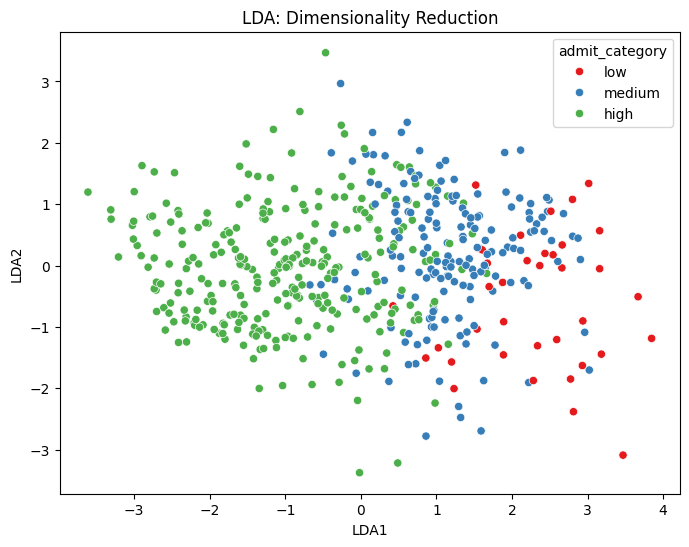

In [91]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LDA1', y='LDA2', hue='admit_category', data=df_lda, palette='Set1')
plt.title('LDA: Dimensionality Reduction')
plt.show()

Check Number of Classes: If the "Chance of Admit" variable is categorized into three classes (low, medium, high), then LDA can have a maximum of 2 components because it’s limited by the (k-1) number of classes

Explained Variance Ratio: After applying LDA, the variance explained by each component should be checked using the explained_variance_ratio_ attribute. This will show how much class separability each component captures.

4. Linear Regression on LDA Transformed Data:
- Use the transformed features from LDA as input for linear regression to predict the original continuous "Chance
of Admit" values.
- Compare the performance of the linear regression model using two different approaches:
(1) TensorFlow:
- Convert the LDA-transformed data into TensorFlow tensors.
- Initialize weights and biases.
- Define the linear regression model and a loss function (Mean Squared Error).
- Use Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.01 and train for 1000 epochs.
- Visualize the actual vs. predicted labels.
(2) Scikit-Learn:
- Use the LinearRegression class from Scikit-Learn to create and train the model.
- Visualize and compare the performance.

In [92]:
X_lda = df_lda[['LDA1', 'LDA2']]
y_original = df['Chance of Admit ']

Epoch 0, Loss: 0.019877556711435318
Epoch 100, Loss: 0.003452784614637494
Epoch 200, Loss: 0.003451657248660922
Epoch 300, Loss: 0.0034516530577093363
Epoch 400, Loss: 0.0034516535233706236
Epoch 500, Loss: 0.0034516535233706236
Epoch 600, Loss: 0.0034516530577093363
Epoch 700, Loss: 0.0034516530577093363
Epoch 800, Loss: 0.0034516530577093363
Epoch 900, Loss: 0.0034516530577093363


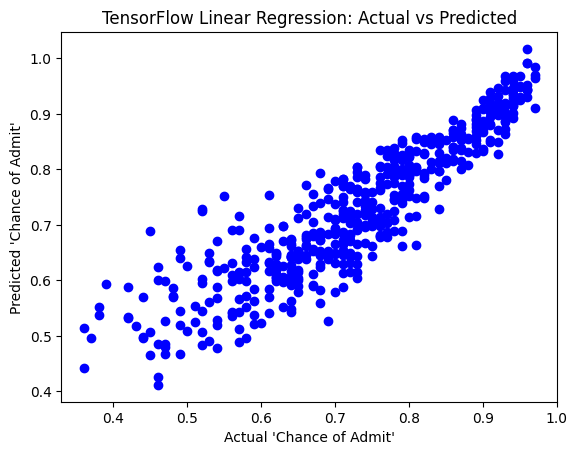

In [93]:
X_lda_tf = tf.convert_to_tensor(X_lda.values, dtype=tf.float32)
y_original_tf = tf.convert_to_tensor(y_original.values.reshape(-1, 1), dtype=tf.float32)

n_features = X_lda.shape[1]
weights = tf.Variable(tf.random.normal([n_features, 1]), dtype=tf.float32)
bias = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

def linear_model(X):
    return tf.matmul(X, weights) + bias
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.optimizers.SGD(learning_rate=0.01)

epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = linear_model(X_lda_tf)
        loss = loss_fn(y_original_tf, y_pred)

    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

y_pred_tf = linear_model(X_lda_tf).numpy()

plt.scatter(y_original, y_pred_tf, color='blue')
plt.xlabel("Actual 'Chance of Admit'")
plt.ylabel("Predicted 'Chance of Admit'")
plt.title("TensorFlow Linear Regression: Actual vs Predicted")
plt.show()


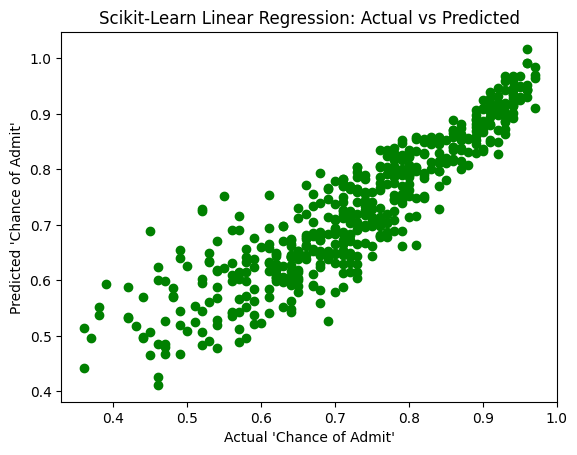

In [94]:
lr_model = LinearRegression()
lr_model.fit(X_lda, y_original)
y_pred_sklearn = lr_model.predict(X_lda)
plt.scatter(y_original, y_pred_sklearn, color='green')
plt.xlabel("Actual 'Chance of Admit'")
plt.ylabel("Predicted 'Chance of Admit'")
plt.title("Scikit-Learn Linear Regression: Actual vs Predicted")
plt.show()

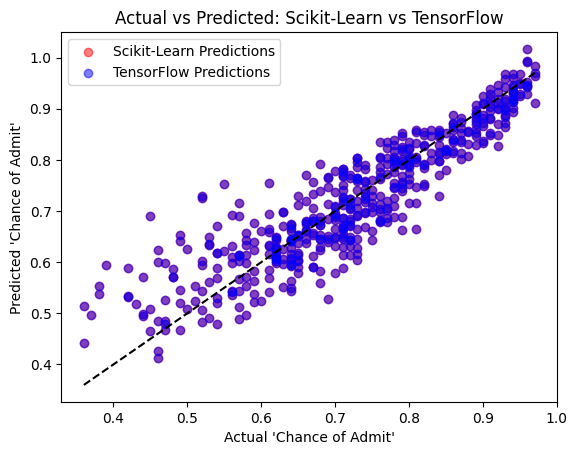

In [95]:
plt.scatter(y_original, y_pred_sklearn, color='red', label='Scikit-Learn Predictions', alpha=0.5)
plt.scatter(y_original, y_pred_tf, color='blue', label='TensorFlow Predictions', alpha=0.5)
plt.plot([min(y_original), max(y_original)], [min(y_original), max(y_original)], color='black', linestyle='--')
plt.xlabel("Actual 'Chance of Admit'")
plt.ylabel("Predicted 'Chance of Admit'")
plt.title("Actual vs Predicted: Scikit-Learn vs TensorFlow")
plt.legend()
plt.show()


In [96]:
mse_sklearn = mean_squared_error(y_original, y_pred_sklearn)
r2_sklearn = r2_score(y_original, y_pred_sklearn)
mse_tf = mean_squared_error(y_original, y_pred_tf)
r2_tf = r2_score(y_original, y_pred_tf)
print(f"Scikit-learn MSE: {mse_sklearn}, R²: {r2_sklearn}")
print(f"TensorFlow MSE: {mse_tf}, R²: {r2_tf}")

Scikit-learn MSE: 0.003451653150089162, R²: 0.8204748339791896
TensorFlow MSE: 0.003451653048732758, R²: 0.8204748392508738


5. Logistic Regression:
- Convert the "Chance of Admit" into three categories (low, medium, and high) using an appropriate binning
technique.
-
Implement logistic regression to predict the categorized admission chances using TensorFlow:
- Build the model using TensorFlow and use the Softmax activation function for multi-class classification.
- Tune the learning rate to optimize performance, evaluating the impact of different values.
- Compare the performance of logistic regression with other models like Random Forest (implemented in the
- previous Assignment), focusing on metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

In [97]:
y_cat = df_scaled['admit_category']
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_cat, test_size=0.2, random_state=42)
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.values.reshape(-1, 1))
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train_onehot, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test_onehot, dtype=tf.float32)

In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, activation='softmax')
])
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32, validation_data=(X_test_tf, y_test_tf))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2180 - loss: 1.6508 - val_accuracy: 0.2000 - val_loss: 1.5959
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2430 - loss: 1.4965 - val_accuracy: 0.2400 - val_loss: 1.4688
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3058 - loss: 1.3513 - val_accuracy: 0.3300 - val_loss: 1.3587
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3620 - loss: 1.2489 - val_accuracy: 0.3600 - val_loss: 1.2667
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4252 - loss: 1.1555 - val_accuracy: 0.4200 - val_loss: 1.1883
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5003 - loss: 1.0550 - val_accuracy: 0.4900 - val_loss: 1.1219
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5699 - loss: 1.0038 - val_accuracy: 0.5100 - val_loss: 1.0654
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6401 - loss: 0.9334 - val_accuracy: 0.5600 - 

In [99]:
learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model.compile(optimizer=tf.optimizers.SGD(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32, validation_data=(X_test_tf, y_test_tf))


Training with learning rate: 0.001
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8173 - loss: 0.4839 - val_accuracy: 0.7500 - val_loss: 0.5595
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7943 - loss: 0.4824 - val_accuracy: 0.7500 - val_loss: 0.5595
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8183 - loss: 0.4781 - val_accuracy: 0.7500 - val_loss: 0.5594
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8233 - loss: 0.4575 - val_accuracy: 0.7500 - val_loss: 0.5593
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7841 - loss: 0.4895 - val_accuracy: 0.7500 - val_loss: 0.5593
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7940 - loss: 0.4880 - val_accuracy: 0.7500 - val_loss: 0.5592
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8098 - loss: 0.4885 - val_accuracy: 0.7500 - val_loss: 0.5592
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8140 - los

In [100]:
test_loss, test_accuracy = model.evaluate(X_test_tf, y_test_tf)
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8004 - loss: 0.4996 
Test Accuracy: 0.7900000214576721


In [101]:
category_names = encoder.categories_[0]
y_pred_proba = model.predict(X_test_tf)
y_pred_class_numeric = tf.argmax(y_pred_proba, axis=1).numpy()
y_pred_class = [category_names[i] for i in y_pred_class_numeric]
print(classification_report(y_test, y_pred_class))
roc_auc = roc_auc_score(y_test_onehot, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc}")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

        high       0.86      0.83      0.85        53
         low       1.00      0.40      0.57        10
      medium       0.69      0.84      0.76        37

    accuracy                           0.79       100
   macro avg       0.85      0.69      0.72       100
weighted avg       0.81      0.79      0.79       100

ROC-AUC Score: 0.915715177240669


In [102]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
y_pred_proba_rf = rf_model.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test_onehot, y_pred_proba_rf, multi_class='ovr')
print(f"Random Forest ROC-AUC Score: {roc_auc_rf}")

              precision    recall  f1-score   support

        high       0.83      0.85      0.84        53
         low       0.50      0.40      0.44        10
      medium       0.66      0.68      0.67        37

    accuracy                           0.74       100
   macro avg       0.66      0.64      0.65       100
weighted avg       0.74      0.74      0.74       100

Random Forest ROC-AUC Score: 0.8782129560311013


6. Hyperparameter Tuning:
- Explore different learning rates for the models and assess their impact on convergence speed, accuracy, and loss.
- Use techniques like grid search or random search for tuning other hyperparameters (e.g., regularization strength).

In [103]:
learning_rates = [0.001, 0.01, 0.1]
history_data = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model.compile(optimizer=tf.optimizers.SGD(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32, validation_data=(X_test_tf, y_test_tf))
    history_data[lr] = history


Training with learning rate: 0.001
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8322 - loss: 0.3833 - val_accuracy: 0.7900 - val_loss: 0.4781
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8306 - loss: 0.3790 - val_accuracy: 0.7900 - val_loss: 0.4781
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.4074 - val_accuracy: 0.7900 - val_loss: 0.4781
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8227 - loss: 0.3966 - val_accuracy: 0.7900 - val_loss: 0.4781
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8337 - loss: 0.3867 - val_accuracy: 0.7900 - val_loss: 0.4780
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7989 - loss: 0.4169 - val_accuracy: 0.7900 - val_loss: 0.4780
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8061 - loss: 0.4277 - val_accuracy: 0.7900 - val_loss: 0.4780
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8222 - los

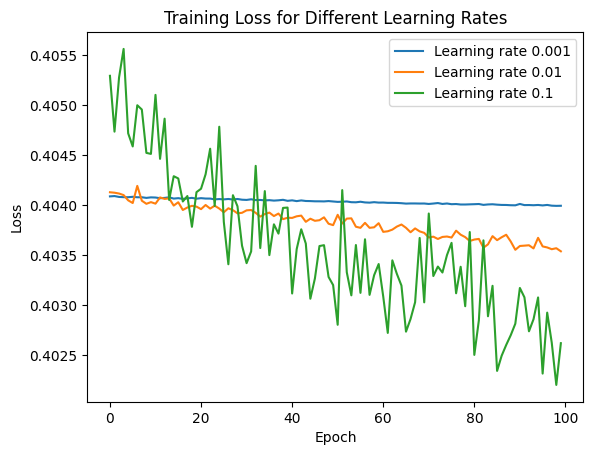

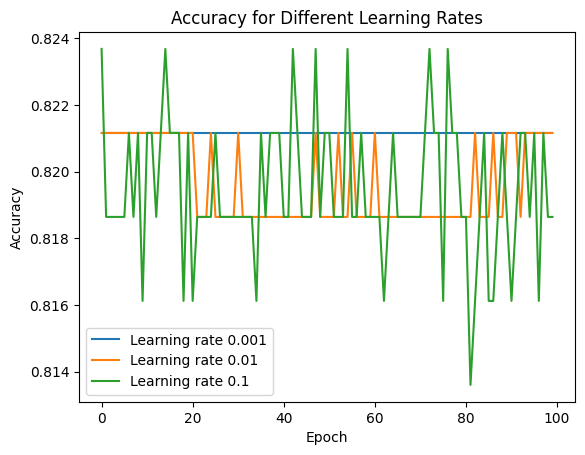

In [104]:
for lr, history in history_data.items():
    plt.plot(history.history['loss'], label=f'Learning rate {lr}')

plt.title('Training Loss for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

for lr, history in history_data.items():
    plt.plot(history.history['accuracy'], label=f'Learning rate {lr}')

plt.title('Accuracy for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [105]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8161075949367088


6th one:
linear reg model
logistic reg model

Training with learning rate: 0.001
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.3828 - val_loss: 2.7892
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0845 - val_loss: 2.4937
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9107 - val_loss: 2.2292
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3681 - val_loss: 1.9978
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1389 - val_loss: 1.7971
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9314 - val_loss: 1.6183
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6637 - val_loss: 1.4570
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6556 - val_loss: 1.3183
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4521 - val_loss: 1.1951
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3923 - val_loss: 1.0813
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2078 - val_loss: 0.9842
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0956 - val_l

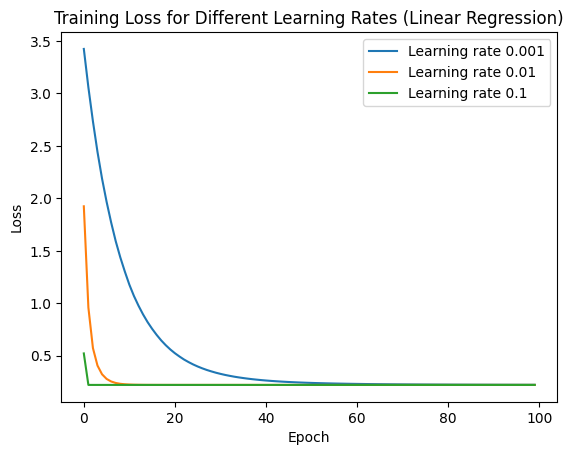

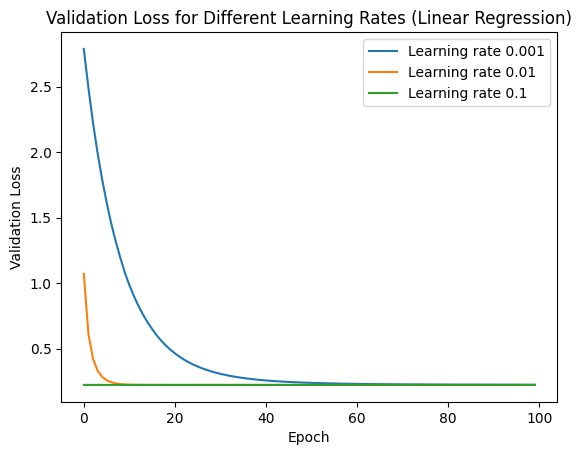

In [106]:
learning_rates = [0.001, 0.01, 0.1]
history_data = {}
def create_linear_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=(X_train.shape[1],))
    ])
    return model
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    model = create_linear_model()
    model.compile(optimizer=tf.optimizers.SGD(learning_rate=lr),
                  loss='mean_squared_error')
    history = model.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32, validation_data=(X_test_tf, y_test_tf))
    history_data[lr] = history
for lr, history in history_data.items():
    plt.plot(history.history['loss'], label=f'Learning rate {lr}')
plt.title('Training Loss for Different Learning Rates (Linear Regression)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

for lr, history in history_data.items():
    plt.plot(history.history['val_loss'], label=f'Learning rate {lr}')
plt.title('Validation Loss for Different Learning Rates (Linear Regression)')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


now for logistic reg

Training with learning rate: 0.001
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6052 - loss: 0.9098 - val_accuracy: 0.5600 - val_loss: 0.9505
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6115 - loss: 0.9192 - val_accuracy: 0.5700 - val_loss: 0.9467
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6297 - loss: 0.9046 - val_accuracy: 0.5700 - val_loss: 0.9428
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5462 - loss: 0.9805 - val_accuracy: 0.5700 - val_loss: 0.9391
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5801 - loss: 0.9161 - val_accuracy: 0.5800 - val_loss: 0.9354
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5862 - loss: 0.9209 - val_accuracy: 0.5900 - val_loss: 0.9319
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6160 - loss: 0.8858 - val_accuracy: 0.5900 - val_loss: 0.9284
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5957 - los

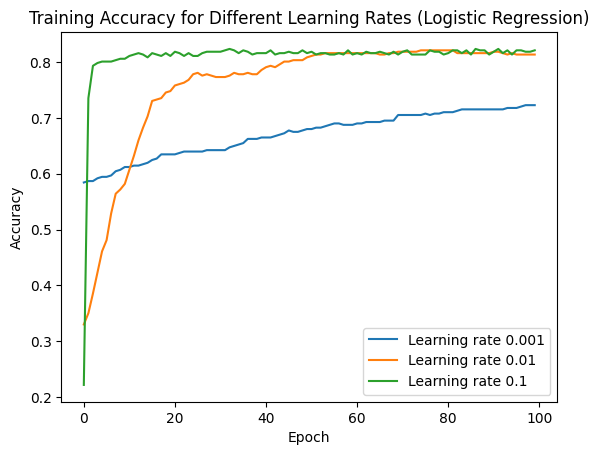

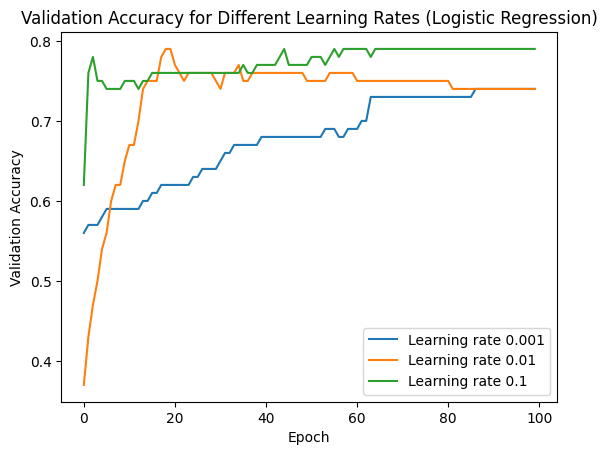

In [107]:
learning_rates = [0.001, 0.01, 0.1]
history_data = {}

def create_logistic_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=3, activation='softmax', input_shape=(X_train.shape[1],))
    ])
    return model

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    model = create_logistic_model()
    model.compile(optimizer=tf.optimizers.SGD(learning_rate=lr),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_tf, y_train_tf, epochs=100, batch_size=32, validation_data=(X_test_tf, y_test_tf))
    history_data[lr] = history

for lr, history in history_data.items():
    plt.plot(history.history['accuracy'], label=f'Learning rate {lr}')
plt.title('Training Accuracy for Different Learning Rates (Logistic Regression)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
for lr, history in history_data.items():
    plt.plot(history.history['val_accuracy'], label=f'Learning rate {lr}')
plt.title('Validation Accuracy for Different Learning Rates (Logistic Regression)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


grid search for logistic reg

In [108]:

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8161075949367088


for random forest using randomized search

In [109]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_model = RandomForestClassifier()

random_search = RandomizedSearchCV(rf_model, param_dist, cv=5, scoring='accuracy', n_iter=10)
random_search.fit(X_train, y_train)

print("Best Parameters (Random Search):", random_search.best_params_)
print("Best Cross-Validation Accuracy (Random Search):", random_search.best_score_)


Best Parameters (Random Search): {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}
Best Cross-Validation Accuracy (Random Search): 0.8036392405063291


Convergence Speed: The learning rate directly impacts how fast the model converges to an optimal solution. A moderate learning rate typically offers the best balance between speed and stability.

Accuracy: A moderate learning rate will help the model reach high accuracy without oscillating, while a high learning rate might cause the model to achieve fast but erratic accuracy.

Loss: Learning rate affects the stability of the loss function during training. A low learning rate leads to gradual loss reduction, while a high learning rate might cause oscillations in the loss function.


Conclusion:

Low Learning Rate (e.g., 0.001): Stable but slow convergence. The model takes longer to minimize loss and improve accuracy but is less likely to diverge.

Moderate Learning Rate (e.g., 0.01): Best trade-off between convergence speed, accuracy, and loss. The model converges faster and achieves good generalization.

High Learning Rate (e.g., 0.1): Faster convergence initially but may result in oscillations or divergence. Validation accuracy might drop, indicating overfitting or unstable learning.

7. Model Evaluation:
- Use k-fold cross-validation to evaluate the generalization of your models.
- Report model performance metrics including accuracy, precision, recall, F1-score, and AUC-ROC.
- Discuss areas of improvement and any potential biases in the models.

In [110]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

log_reg = LogisticRegression()

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted',
}

cv_results = cross_validate(log_reg, X_train, y_train_encoded, cv=5, scoring=scoring)

print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f}")
print(f"F1-Score: {cv_results['test_f1'].mean():.4f}")

roc_auc = cross_val_score(log_reg, X_train, y_train_encoded, cv=5, scoring='roc_auc_ovr').mean()
print(f"AUC-ROC: {roc_auc:.4f}")

Accuracy: 0.8136
Precision: 0.8194
Recall: 0.8136
F1-Score: 0.8075
AUC-ROC: 0.9300




Areas of Improvement

- Feature Engineering: Explore creating new features or transforming existing ones to potentially improve model performance. For example, you could try interactions between features or polynomial terms.
- Algorithm Selection: Experiment with other algorithms suitable for classification tasks, such as Support Vector Machines (SVM) or K-Nearest Neighbors (KNN). Comparing their performance with logistic regression and random forest could lead to better results.
- Hyperparameter Optimization: Conduct a more extensive hyperparameter search using techniques like Bayesian optimization or genetic algorithms to find the optimal settings for each model.
- Data Augmentation: If the dataset is limited, consider using data augmentation techniques to increase the number of training samples. This can help improve model generalization.
Potential Biases

- Data Bias: The dataset used for training might contain inherent biases reflecting real-world inequalities. For example, if the dataset overrepresents applicants from certain demographics, the model might unintentionally perpetuate these biases in its predictions.
- Model Bias: The choice of model and its hyperparameters can introduce biases. For example, a complex model might overfit the training data and perform poorly on unseen data, leading to biased predictions.
- Evaluation Bias: The evaluation metrics used should be carefully chosen to avoid bias. For example, relying solely on accuracy might be misleading if the classes are imbalanced. Using a combination of metrics like precision, recall, and F1-score provides a more comprehensive evaluation.
Addressing Biases

- Data Collection: Ensure the dataset is diverse and representative of the population of interest. Address any imbalances or biases in the data before training the model.
- Model Selection: Choose models that are less prone to bias or use techniques like regularization to mitigate bias.
- Fairness-Aware Evaluation: Incorporate fairness metrics into the evaluation process to assess and mitigate potential biases in the model's predictions.
- Regular Monitoring: Continuously monitor the model's performance and retrain it with updated data to ensure it remains unbiased and accurate over time.